<a href="https://colab.research.google.com/github/ISMRM-MIT-CMR/CMR-DL-challenge/blob/master/tutorial_complex_activations_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial: Complex Activation Functions

In this tutorial, we study the impact of various activation functions wrt. magnitude and phase. Your task will be to implement the activation functions in numpy and study their advantages and disadvantages.

# References
1. Trabelsi et al. [Deep Complex Networks](https://openreview.net/pdf?id=H1T2hmZAb). In: Proceedings of ICLR, 2018.
2. Virtue et al. [Complex-valued Deep Learning with Applications to Magnetic Resonance Image Synthesis](https://www2.eecs.berkeley.edu/Pubs/TechRpts/2019/EECS-2019-126.pdf), PhD thesis, 2019.
3. Daval-Frerot et al. [Exploring Complex-Valued Neural Networks with Trainable Activation Functions for Magnetic Resonance Imaging.](https://index.mirasmart.com/ISMRM2019/PDFfiles/0469.html). In: Proceedings of ISMRM, p. 0469, 2019.

As a first step, we provide a plotting function to display magnitude and phase.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot(z, title):
    """ Plotting of magnitude and phase for the given complex image z. """
    z_magn = np.abs(z)
    z_phase = np.angle(z)
    fig = plt.figure(figsize=(10,5))

    ax1 = fig.add_subplot(1, 2, 1, projection='3d')

    ax1.set_xlabel('Real')
    ax1.set_ylabel('Imag')
    surf = ax1.plot_surface(zre, zim, z_magn, cmap='viridis',
                           linewidth=0, antialiased=False)

    ax1.set_title(f'Magnitude: {title}')
    ax1.view_init(elev=10., azim=-135)
    
    ax2 = fig.add_subplot(1, 2, 2)

    ax2.set_xlabel('Real')
    ax2.set_ylabel('Imag')
    surf = ax2.imshow(z_phase, cmap='hsv', extent=[-Ndim, Ndim, Ndim, -Ndim], vmin=-np.pi, vmax=np.pi)
    ax2.set_title(f'Phase: {title}')
    ax2.invert_yaxis()
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(surf, cax=cax, ticks=[-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
    cbar.ax.set_yticklabels(['-pi', '-pi/2', '0', 'pi/2', 'pi'])
    
    plt.show()


Let us define and visualize an image on the complex plane using a meshgrid in the interval $[-1,1]$.

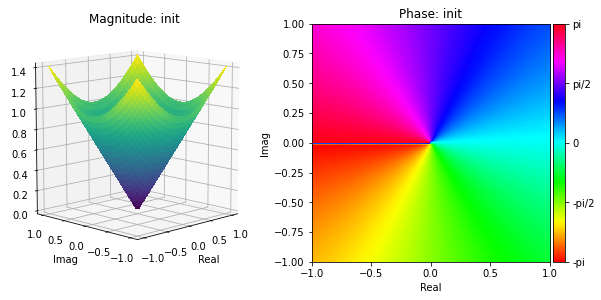

In [2]:
Ndim = 1
zre = zim = np.linspace(-Ndim, Ndim, 101)
[zre, zim] = np.meshgrid(zre, zim)

z = zre + 1j*zim

plot(z, 'init')

## Complex ReLU (cReLU)
The complex ReLU applies the ReLU activation to real and imaginary parts separately.

$$ \text{cReLU}(z) = \text{ReLU}(\mathcal{Re}(z)) + j \cdot  \text{ReLU}(\mathcal{Im}(z))$$

*Task:* Implement the crelu activation function. To which interval do magnitude and phase map?


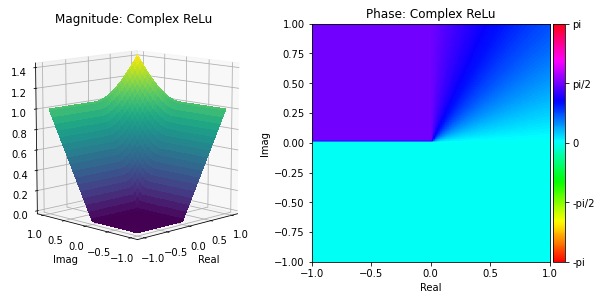

In [3]:
def crelu(z):
    return np.maximum(0, np.real(z)) + 1j*np.maximum(0, np.imag(z))

z_crelu = crelu(z)

plot(z_crelu, 'Complex ReLu')

## Separable Sigmoid
$$\text{separableSigmoid} = h(\mathcal{Re}(z)) + j\cdot h(\mathcal{Im}(z)), $$ 
where
$$h(z) = \frac{1}{1 + e^{-z}}.$$

*Task:* Implement the separable Sigmoid activation function. To which interval do magnitude and phase map?

### Further References
1. Nitta Tohru. [An extension of the back-propagation algorithm to complex numbers](https://www.sciencedirect.com/science/article/abs/pii/S0893608097000361?via%3Dihub). Neural Networks, 10(9):1391–1415, November 1997.

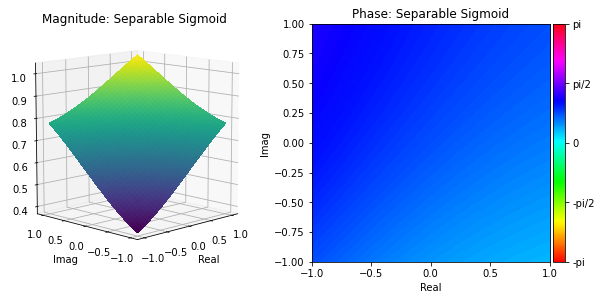

In [4]:
def separable_sigmoid(z):
    def phi(z):
        return 1.0 / (1.0 + np.exp(-z))
    return phi(np.real(z)) + 1j*phi(np.imag(z))

z_separable_sigmoid = separable_sigmoid(z)
plot(z_separable_sigmoid, 'Separable Sigmoid')

## Siglog
The next function we considere here is the Siglog, which applies the sigmoid function to the logarithm of the magnitude of $z$, following
$$ \text{siglog}(z) = h(log(\vert z \vert))e^{-j\cdot \angle z} = \frac{z}{1 + \vert z \vert},$$ where
$$ h(z) = \frac{1}{1 + e^{-z}}. $$

*Task:* Implement the Siglog activation function. To which interval do magnitude and phase map? What is the difference to the previous functions that we have considered so far?

### Further references
1. Georgiou and Koutsougeras. [Complex domain backpropagation](https://ieeexplore.ieee.org/document/142037). IEEE Trans- actions on Circuits and Systems II: Analog and Digital Signal Processing, 39(5):330–334, 1992.


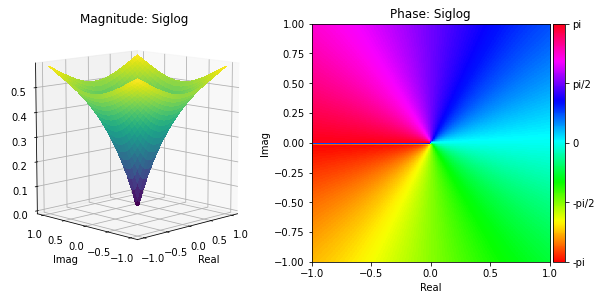

In [5]:
def siglog(z):
    return z / (1 + np.abs(z))

z_siglog = siglog(z)
plot(z_siglog, 'Siglog')

## Inverted Gaussian (iGaussian)

Next, we investigate the inverted Gaussian activation, termed iGaussian, proposed by [Virtue et al.](https://www2.eecs.berkeley.edu/Pubs/TechRpts/2019/EECS-2019-126.pdf) The iGaussian is defined as follows
$$ \text{iGaussian}(z, \sigma^2) = h(z, \sigma^2) e^{j\cdot\angle{z}},$$ where 
$$ h(z,\sigma^2) = 1 - e^{-\frac{z^*z}{2\sigma^2}}.$$
Here, $*$ denotes the adjoint operation, and $\sigma$ is the standard deviation, scaling the width of the Gaussian.

*Task:* Implement the iGaussian activation function. To which interval do magnitude and phase map? Play with different values of $\sigma$ to find out how the activation function behaves!

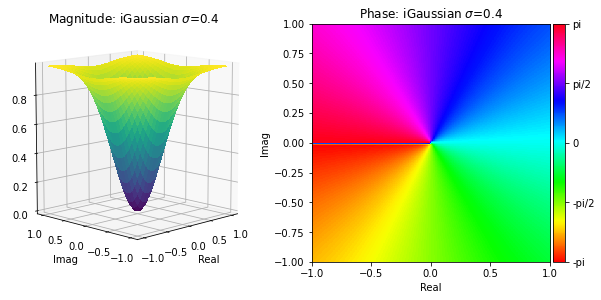

In [6]:
def iGaussian(x, sigma):
    norm_sq = np.conj(x)*x
    g = 1 - np.exp(-norm_sq / (2*sigma**2))
    arg = np.angle(x)
    n = np.exp(1j*arg)
    return np.real(g) * n

sigma = 0.4
z_iGaussian = iGaussian(z, sigma=sigma)
plot(z_iGaussian, f'iGaussian $\sigma$={sigma:.2g}')

## Cardioid
Another new activation function proposed by [Virtue et al.](https://www2.eecs.berkeley.edu/Pubs/TechRpts/2019/EECS-2019-126.pdf) is the Cardioid activation, which can be seen as a generalization of the ReLU activation function for real numbers. The Cardioid is defined as

$$ \text{Cardioid}(z) = \frac{1}{2} (1 + \cos(\angle z)) z.$$

*Task 1* Implement the Cardioid function. To which interval do magnitude and phase map? Explain in your own words, how the Cardoid works in contrast to the other complex activation functions that we have considered so far. Explain how this generalization reduces to the ReLU activation for real numbers.

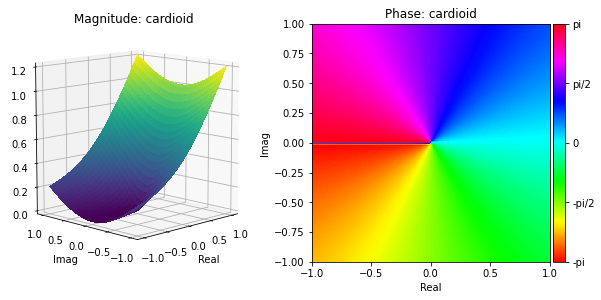

In [7]:
def cardioid(z):
    return 0.5*(1 + np.cos(np.angle(z)))*z

z_cardioid = cardioid(z)
plot(z_cardioid, 'cardioid')

*Task 2* Now, alter the Cardioid function in order to rotate the complex activation function on the complex meshgrid. Implement the modification by introducing a bias, and experiment with different values to rotate the Cardioid function.

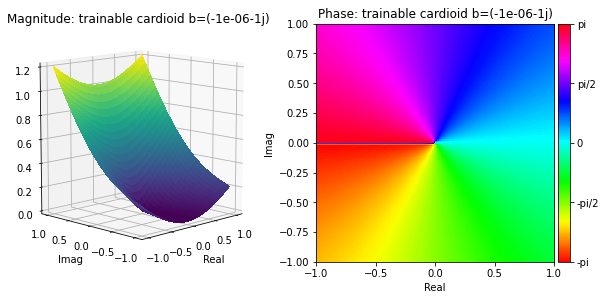

In [8]:
def trainable_cardioid(z, b):
    arg = np.angle(z) + np.angle(b)
    cos_arg = np.cos(arg)
    return 0.5*(1.0 + cos_arg)*z

b = -1e-6 - 1j*1

z_cardioid_trainable = trainable_cardioid(z, b)
plot(z_cardioid_trainable, f'trainable cardioid b={b}')

## ModReLU
A further variant of the ReLU is the ModReLU (Arjovsky et al., 2016) function defined as
$$ \text{ModReLU}(z) = \text{ReLU}(\vert z \vert + b)e^{j\cdot\angle{z}},$$
where $b\in\mathbf{R}$ is a learnable bias parameter, to shift the magnitude around the origin.

*Task:* Implement the iGaussian activation function. To which interval do magnitude and phase map? Play with different values of $b$ to find out how the activation function behaves!

### Further references
1. Arjovsky et al. [Unitary evolution recurrent neural networks](https://dl.acm.org/doi/10.5555/3045390.3045509). In: Proceedings of ICML, pp. 1120-1128, 2016.

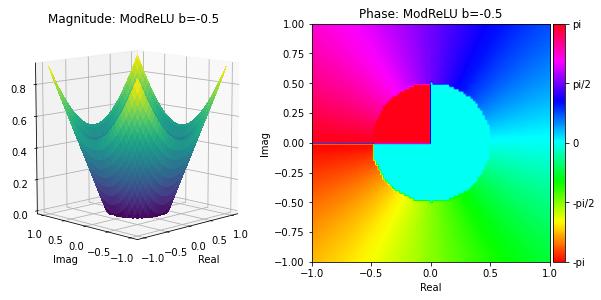

In [9]:
# ModReLU
def ModReLU(z, b):   
    magn = np.abs(z)
    arg = np.angle(z)
    n = np.exp(1j*arg)
    return np.maximum(0, magn + b)*n

b = -0.5

z_modrelu = ModReLU(z, b)
plot(z_modrelu, f'ModReLU b={b}')

## Gaussian Radial Basis Functions
Finally, we consider a family of trainable activation functions based on Gaussian radial basis functions. The weighting $w$ of the single bases can be learned, thus, allowing to model any function. The Gaussian RBF $\phi$ reads as
$$ \phi(z) = \sum_{i=1}^{N_w} w_i e^{-\frac{(z - \mu_i)^2}{2 \sigma^2}},$$
where $N_w$ is the number of bases, and $mu$ define the nodes that are distributed evenly between an interval $[vmin,vmax]$.

![Gaussian Radial Basis Functions](https://github.com/ISMRM-MIT-CMR/CMR-DL-challenge/blob/master/rbf.png?raw=true)

### Further references
- Trainable activation functions are contained in the [optox](https://github.com/VLOGroup/optox.git) package.

In [10]:
def rbf(xx, vmin, vmax, sigma=0.1, init='triangle'):
    shape = xx.shape
    Nw = 20
    mu = np.linspace(vmin, vmax, Nw)
    # lazy inits
    if init == 'triangle':
        w = np.maximum(1 - np.abs(np.linspace(-1, 1, Nw)), 0)
    elif init == 'linear':
        w = np.linspace(-1, 1, Nw)
    elif init == 'abs':
        w = np.abs(np.linspace(-1, 1, Nw))

    result = np.dot(np.exp(-(xx.flatten()[:,None] - mu[None,:])**2/(2 * sigma**2)),w)
    return result.reshape(shape)

*Task:* Given the code for the `rbf`, implement the [complex RBF](https://index.mirasmart.com/ISMRM2019/PDFfiles/0469.html) $\phi_c$ according to
$$ \phi_{c}(z) = \phi(\mathcal{Re}(z)) + j\cdot \phi(\mathcal{Im}(z)).$$

To which interval do magnitude and phase map? Play around with different weight initializations and values for $\sigma$.

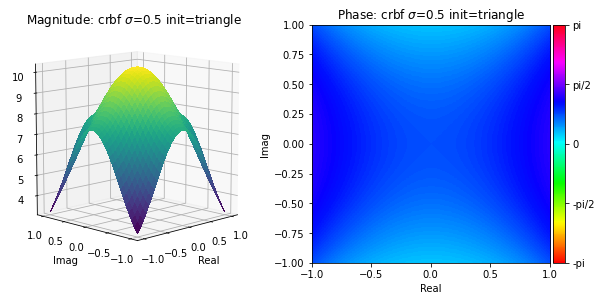

In [11]:
def crbf(z, sigma=1, init='triangle'):
    re = rbf(np.real(z), -Ndim, Ndim, sigma=sigma, init=init)
    im = rbf(np.imag(z), -Ndim, Ndim, sigma=sigma, init=init)
    
    return re + 1j*im
   
sigma = 0.5
init = 'triangle'
z_crbf = crbf(z, sigma, init)
plot(z_crbf, f'crbf $\sigma$={sigma} init={init}')

Finally, we extend this now to the polar RBF where $\phi$ can be applied to both magnitude and phase, following

$$ \phi_{polar}(z) = \phi(\vert z \vert) e^{j \cdot \phi(\angle z)}. $$

*Task:* Implement the polar RBF. How do you have to initialize the phase such that it maintained? Experiment with different initializations and $\sigma$ values for both the RBF of the magnitude and the phase.

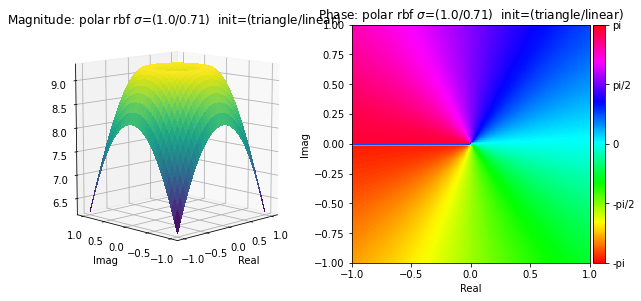

In [12]:
def polar_rbf(z, sigma_magn=1, sigma_phase=1, init_magn='triangle', init_phase='linear'):
    magn = rbf(np.abs(z), 0, Ndim, sigma=sigma_magn, init=init_magn)
    phase = rbf(np.angle(z), -4, 4, sigma=sigma_phase, init=init_phase)
    #phase = np.angle(x)
    return magn * np.exp(1j*phase)

sigma_magn=1.0
sigma_phase=1/np.sqrt(2)
init_magn='triangle'
init_phase='linear'
z_polarrbf = polar_rbf(z, sigma_magn, sigma_phase, init_magn, init_phase)
plot(z_polarrbf, f'polar rbf $\sigma$=({sigma_magn}/{sigma_phase:.2g})  init=({init_magn}/{init_phase})')